# Asset Pricing Models- Part I

In this part, instead of visiting a website and downloading the data to our local computer, we directly access to `yahoo finance` and retrieve the data as  we have learned in the previous lesson. To compare the performance of the companies, we will run CAPM analyses with three difference companies operating in finance sector. These companies are `Apple`, `IBM`,`Microsoft`, `Intel` and the market these stocks are listed is `S&P-500`. We use tickers to retreive data from yahoo finance:
 
 * AAPL: Apple
 * IBM: IBM
 * MSFT: Microsoft
 * INTC: Intel
 * ^GSPC: S&P-500

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override() 
%matplotlib inline
warnings.filterwarnings('ignore')

The analysis covers the business day for the period of 01-01-2016 and 01-01-2020 with monthly stock price data.

In [2]:
stocks = ['AAPL','IBM','MSFT','INTC','^GSPC']
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,4,1)
stock_prices = yf.download(stocks,start=start,end = end, interval='1d')

[*********************100%***********************]  5 of 5 completed


In [3]:
stock_prices.head()

Adj Close                                                  \
                  AAPL         IBM       INTC        MSFT        ^GSPC   
Date                                                                     
2020-12-31  132.069473  121.449242  48.898537  220.974640  3756.070068   
2021-01-04  128.804825  119.577530  48.751308  216.275375  3700.649902   
2021-01-05  130.397324  121.700096  49.673923  216.484009  3726.860107   
2021-01-06  126.007957  124.739220  50.154858  210.870728  3748.139893   
2021-01-07  130.307755  124.449783  51.224697  216.871460  3803.790039   

                 Close                                                  ...  \
                  AAPL         IBM       INTC        MSFT        ^GSPC  ...   
Date                                                                    ...   
2020-12-31  132.690002  125.879997  49.820000  222.419998  3756.070068  ...   
2021-01-04  129.410004  123.940002  49.669998  217.690002  3700.649902  ...   
2021-01-05  131.009995  126.139999  50.610001  217.899994  3726.860107  ...   
2021-01-06  126.599998  129.289993  51.099998  212.250000  3748.139893  ...   
2021-01-07  130.919998  128.990005  52.189999  218.289993  3803.790039  ...   

                  Open                                                  \
                  AAPL         IBM       INTC        MSFT        ^GSPC   
Date                                                                     
2020-12-31  134.080002  124.220001  48.750000  221.699997  3733.270020   
2021-01-04  133.520004  125.849998  49.889999  222.529999  3764.610107   
2021-01-05  128.889999  125.010002  49.450001  217.259995  3698.020020   
2021-01-06  127.720001  126.900002  50.439999  212.169998  3712.199951   
2021-01-07  128.360001  130.039993  51.490002  214.039993  3764.709961   

               Volume                                           
                 AAPL      IBM      INTC      MSFT       ^GSPC  
Date                                                            
2020-12-31   99116600  3574400  28576800  20942100  3172510000  
2021-01-04  143301900  5179200  46102500  37130100  5006680000  
2021-01-05   97664900  6114600  24866600  23823000  4582620000  
2021-01-06  155088000  7956700  36809600  35930700  6049970000  
2021-01-07  109578200  4507400  32092300  27694500  5080870000  

[5 rows x 30 columns]

In [4]:
stock_prices=stock_prices['Close']

In [5]:
stock_prices.dropna(inplace=True)

Summary statistics is a very first step to explore the dataset. Main statistics such as mean, standard deviation, minimum, maximum etc., can be calculated via `.describe()` in Python. Initial observation tells us that the price level and volatility (represented by standard deviation) of S&P-500 is quite different from the rest of the stocks.

In [6]:
stock_prices.describe()

,AAPL,IBM,INTC,MSFT,^GSPC
count,62.000000,62.000000,62.000000,62.000000,62.000000
mean,128.427903,125.195968,59.438226,231.866613,3863.938563
std,6.726222,4.862788,4.248762,9.164177,71.994513
min,116.360001,118.580002,49.669998,212.250000,3700.649902
25%,121.984999,120.754999,57.107501,226.894997,3810.167542
50%,128.315002,124.060001,60.530001,233.525002,3873.589966
75%,133.752502,128.985004,62.827500,237.677505,3915.557556
max,143.160004,136.380005,65.779999,244.990005,3974.540039


As the caret sign `^` in the ticker of S&P-500 might cause problem in coding, I prefer rename this column before proceeding:

In [7]:
stock_prices=stock_prices.rename({'^GSPC':'GSPC'}, axis='columns')

Now, after having the return for three stock and one market index, extracting risk free rate allows us to compute excess return. To access the risk free rate data, we use `Fred API` as we have learned previosly. Please note that there is no single risk free rate, different researchers apply different risk free rate but the common property of these rates is that they are issued by a government, which makes them safe heaven to invest. Here, we select `3-Month Treasury Constant Maturity Rate`, which is short-term T-Bill with relatively low and safe return.

Practically speaking, risk-free rate is hypothetical term, because even the safest investments carry a very small amount of risk. However, it is not wrong to say that government-issued debt is much safer compared to comporate-issued one. That is being said, the interest rate on a three-month U.S. Treasury bill is useful proxy for the risk-free rate for U.S.-based investors. 

In [8]:
from fredapi import Fred
fred = Fred(api_key='78b14ec6ba46f484b94db43694468bb1')#type your API key here

In [9]:
fred.search('risk free')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
DGS10,DGS10,2021-09-03,2021-09-03,10-Year Treasury Constant Maturity Rate,1962-01-02,2021-09-01,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2021-09-02 15:18:08-05:00,97,For further information regarding treasury con...
GS10,GS10,2021-09-03,2021-09-03,10-Year Treasury Constant Maturity Rate,1953-04-01,2021-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2021-09-01 15:19:24-05:00,76,Averages of business days. For further informa...
WGS10YR,WGS10YR,2021-09-03,2021-09-03,10-Year Treasury Constant Maturity Rate,1962-01-05,2021-08-27,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2021-08-30 15:23:17-05:00,61,Averages of business days. For further informa...
DGS1,DGS1,2021-09-03,2021-09-03,1-Year Treasury Constant Maturity Rate,1962-01-02,2021-09-01,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2021-09-02 15:19:06-05:00,80,For further information regarding treasury con...
DGS30,DGS30,2021-09-03,2021-09-03,30-Year Treasury Constant Maturity Rate,1977-02-15,2021-09-01,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2021-09-02 15:18:22-05:00,79,Yields on actively traded non-inflation-indexe...
DGS5,DGS5,2021-09-03,2021-09-03,5-Year Treasury Constant Maturity Rate,1962-01-02,2021-09-01,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2021-09-02 15:18:25-05:00,78,For further information regarding treasury con...
WGS1YR,WGS1YR,2021-09-03,2021-09-03,1-Year Treasury Constant Maturity Rate,1962-01-05,2021-08-27,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2021-08-30 15:24:03-05:00,56,Averages of business days. For further informa...
GS1,GS1,2021-09-03,2021-09-03,1-Year Treasury Constant Maturity Rate,1953-04-01,2021-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2021-09-01 15:19:48-05:00,52,Averages of business days. For further informa...
GS30,GS30,2021-09-03,2021-09-03,30-Year Treasury Constant Maturity Rate,1977-02-01,2021-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2021-09-01 15:19:46-05:00,54,Yields on actively traded non-inflation-indexe...


In [10]:
risk_free=fred.get_series('DGS3MO')
risk_free=risk_free['2021-01-01':'2021-04-01']

# TASK-2

Visualization is quite helpful in understanding what the data looks like. So, as a first step, it is encouraged to plot the data and increase the awareness about it. Below, using line plot, trend of the four individual stock and market index are shown. Accordingly, aside from Apple, all others have tended to move upward despite ups and downs along the way.

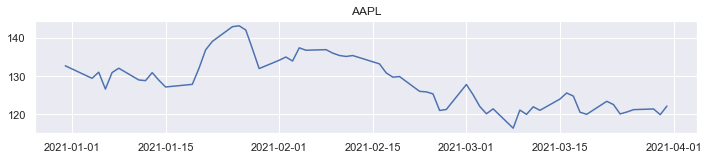

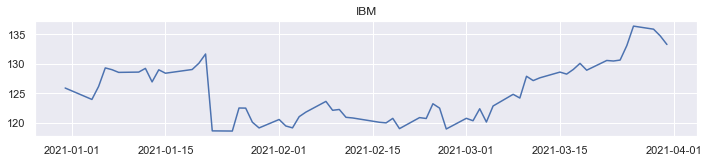

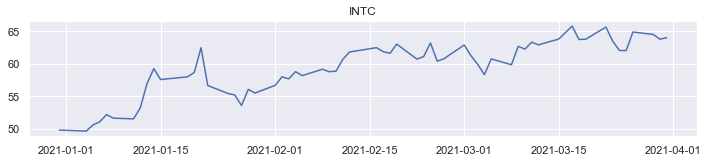

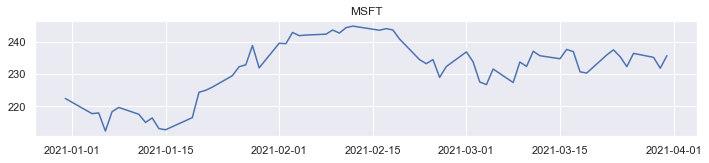

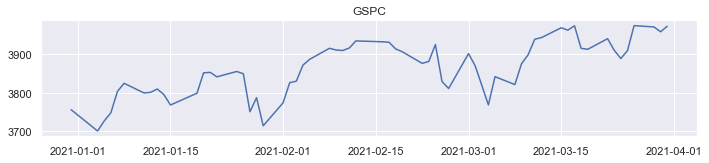

In [11]:
k=1
for i in range(0, len(stock_prices.columns)):
    sns.set
    plt.figure(figsize=(10, 10))
    plt.subplot(5, 1, k)
    plt.plot(stock_prices[stock_prices.columns[i]])
    plt.title("{}".format(stock_prices.columns[i]))
    k+=1
    plt.tight_layout()
    plt.show()
    

Correlation coefficient tells us the extent to which variables are related. `Correlation matrix` is a tool to calculate and visualize the correlation coefficients among the variables of interest. The most striking observation is the correlation coefficient of 84% between Intel and S&P-500 indicating that there is a high correlation between these two variables. However, it is not the case for IBM, Microsoft and Apple whose correlation coefficients with S&P-500 are 28%, 64%, and -28%, respectively.

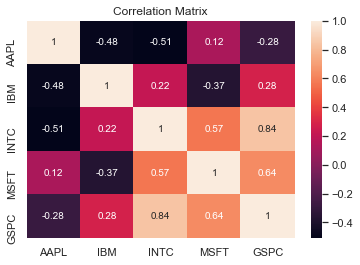

In [12]:
heat_corr=stock_prices.corr()
sns.heatmap(heat_corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

As CAPM requires stock returns, there are various ways to calculate return in Python but `.pct_change()` is one of the most easyto-apply function. Once we calculate the return first row becomes `nan` as return for the first entry cannot be computed.

In [13]:
returns = stock_prices.pct_change()
returns.dropna(inplace=True)
returns.head()

,AAPL,IBM,INTC,MSFT,GSPC
Date,,,,,
2021-01-04,-0.024719,-0.015411,-0.003011,-0.021266,-0.014755
2021-01-05,0.012364,0.017750,0.018925,0.000965,0.007083
2021-01-06,-0.033662,0.024972,0.009682,-0.025929,0.005710
2021-01-07,0.034123,-0.002320,0.021331,0.028457,0.014847
2021-01-08,0.008631,-0.003566,-0.010347,0.006093,0.005492


Let us now convert the 3-month risk-free rate into daily rate. It choose the easy way, which is simply dividing it by number of days in 3 months (90).

In [14]:
rf = risk_free/90

In [15]:
rf = rf.dropna().iloc[:-1]

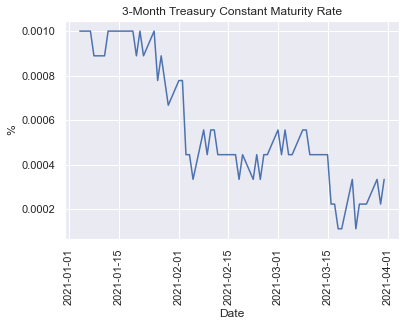

In [16]:
plt.plot(rf)
plt.xlabel('Date')
plt.ylabel('%')
plt.title('3-Month Treasury Constant Maturity Rate')
plt.xticks(rotation=90)
plt.show()

To calculate the excess return, we need to subtract risk free rate from the stock returns. We calculate and stor all excess return in data frame named `returns`.

In [17]:
stocks = ["AAPL", "IBM", "MSFT", "INTC", "GSPC"]
for i in stocks:
    returns["excess_return_"+str(i)] = returns[i] - rf

In [18]:
returns.head()

,AAPL,IBM,INTC,MSFT,GSPC,excess_return_AAPL,excess_return_IBM,excess_return_MSFT,excess_return_INTC,excess_return_GSPC
Date,,,,,,,,,,
2021-01-04,-0.024719,-0.015411,-0.003011,-0.021266,-0.014755,-0.025719,-0.016411,-0.022266,-0.004011,-0.015755
2021-01-05,0.012364,0.017750,0.018925,0.000965,0.007083,0.011364,0.016750,-0.000035,0.017925,0.006083
2021-01-06,-0.033662,0.024972,0.009682,-0.025929,0.005710,-0.034662,0.023972,-0.026929,0.008682,0.004710
2021-01-07,0.034123,-0.002320,0.021331,0.028457,0.014847,0.033123,-0.003320,0.027457,0.020331,0.013847
2021-01-08,0.008631,-0.003566,-0.010347,0.006093,0.005492,0.007742,-0.004455,0.005204,-0.011236,0.004603


# TASK-3

We are ready to run the CAPM analysis after all these preparation process and the interpretation is left to the `TASK-3.`

In [19]:
import statsmodels.api as sm

In [20]:
y_aapl = returns['excess_return_AAPL']
X = returns['excess_return_GSPC']

In [21]:
X = sm.add_constant(X, prepend=False)
CAPM_AAPL= sm.OLS(y_aapl, X)
CAPM_results_AAPL = CAPM_AAPL.fit()

In [22]:
CAPM_results_AAPL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_AAPL   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     46.73
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           5.13e-09
Time:                        19:29:43   Log-Likelihood:                 167.80
No. Observations:                  61   AIC:                            -331.6
Df Residuals:                      59   BIC:                            -327.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.3891      0.203      6.836      0.000       0.982       1.796
const                 -0.0023      0.002     -1.126      0.265      -0.006       0.002
==============================================================================
Omnibus:                        2.777   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.249   Jarque-Bera (JB):                2.142
Skew:                          -0.174   Prob(JB):                        0.343
Kurtosis:                       3.849   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
y_IBM=returns['excess_return_IBM']

In [24]:
X = sm.add_constant(X, prepend=False)
CAPM_IBM= sm.OLS(y_IBM, X)
CAPM_results_IBM = CAPM_IBM.fit()

In [25]:
CAPM_results_IBM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_IBM   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     4.187
Date:                Fri, 03 Sep 2021   Prob (F-statistic):             0.0452
Time:                        19:29:43   Log-Likelihood:                 159.59
No. Observations:                  61   AIC:                            -315.2
Df Residuals:                      59   BIC:                            -311.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     0.4757      0.232      2.046      0.045       0.010       0.941
const                  0.0003      0.002      0.151      0.881      -0.004       0.005
==============================================================================
Omnibus:                       62.009   Durbin-Watson:                   2.274
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.745
Skew:                          -2.671   Prob(JB):                    3.41e-116
Kurtosis:                      16.442   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
y_MSFT=returns['excess_return_MSFT']

In [27]:
X = sm.add_constant(X, prepend=False)
CAPM_MSFT= sm.OLS(y_MSFT, X)
CAPM_results_MSFT = CAPM_MSFT.fit()

In [28]:
CAPM_results_MSFT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_MSFT   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     47.26
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           4.41e-09
Time:                        19:29:43   Log-Likelihood:                 184.67
No. Observations:                  61   AIC:                            -365.3
Df Residuals:                      59   BIC:                            -361.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.0595      0.154      6.875      0.000       0.751       1.368
const               8.649e-05      0.002      0.057      0.955      -0.003       0.003
==============================================================================
Omnibus:                        0.098   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.160
Skew:                           0.088   Prob(JB):                        0.923
Kurtosis:                       2.823   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
y_INTC=returns['excess_return_INTC']

In [30]:
X = sm.add_constant(X, prepend=False)
CAPM_INTC= sm.OLS(y_INTC, X)
CAPM_results_INTC = CAPM_INTC.fit()

In [31]:
CAPM_results_INTC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_INTC   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     36.41
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.14e-07
Time:                        19:29:43   Log-Likelihood:                 146.81
No. Observations:                  61   AIC:                            -289.6
Df Residuals:                      59   BIC:                            -285.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.7298      0.287      6.034      0.000       1.156       2.304
const                  0.0032      0.003      1.140      0.259      -0.002       0.009
==============================================================================
Omnibus:                       14.511   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               56.109
Skew:                          -0.257   Prob(JB):                     6.55e-13
Kurtosis:                       7.670   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

First, we run the CAPM analysis for `Apple` and it turns out that Apple is more volatile than the S&P-500 as we have a beta coefficient of 1.3845. This estimated beta coefficient is statistically significant at 1% level since we have a t-value of 6.847 (or p-value of 0.0000). However, the intercept term is not statistically significant. Therefore, interpretation of the intercept term, which indicates the performance of the technical analysis, does not make sense.

When it comes to `IBM`, the result is quite similar in terms of slope coefficien $\beta$ and intercept term. The beta coefficient of 0.4899 implies that there is a correlation between excess market return and excess return of the IBM. More specifically, 1-unit increase in S&P-500 leads to an increase in IBM return by nearly 0.4899. The result also suggests that the IBM is less risky than market index.  Again, the intercept term is not statistically significant at conventional confidence interval.

`Microsoft` does tell us a similar story with positive and statistically significant beta coefficient and statistically insignificant intercept term. The magnitude of beta coefficient is 1.0577 indicating that 1-unit increase in S&P-500 results in an increase of 1.0577 in Microsoft's return.

In summary, given the result obtained via CAPM, the most and least risky or volatile stocks are INTEL and IBM, respectively.

# TASK-4

CAPM is also a tool for investor to understand whether an asset is fairly priced. To determine that, we need to use $\beta$ that we obtained from CAPM analysis and compare with the investor estimates. The `Security Market Line`(SML) is able to test whether securities are fairly priced or not.

More elaborately, SML exhibits the linear relationship between expected asset returns and betas obtained from CAPM. All the correctly priced securities are plotted on the SML. If the assets lie above the SML line, the assets are undervalued due to the higher return for a given amount of risk. Conversely, the assets lie below the SML are overvalued because it return of this stock is lower for a given amount of risk.

In [32]:
import matplotlib.pyplot as plt

In [53]:
def SML(rf,ret,betas):
    asset_ret = [rf_mean + (rm - rf_mean) * i for i in betas]
    plt.plot(betas, asset_ret)
    plt.xlabel("Asset Beta")
    plt.ylabel("Asset Return")
    plt.title("Security Market Line")
    plt.plot(1, ret, "ro")

In [54]:
ret_cov=returns.iloc[:,:4].cov()

rm = returns['GSPC'].mean()
rf_mean = risk_free.mean()
betas = [CAPM_results_AAPL.params[0],CAPM_results_IBM.params[0],
       CAPM_results_MSFT.params[0],CAPM_results_INTC.params[0]]

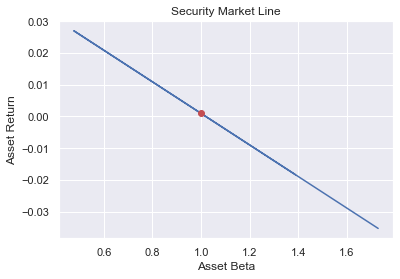

In [55]:
SML(rf_mean, rm, betas)

Given the beta, if the stock locates below the SML, this implies that stock has a lower return per unit of risk assumed. Hence, it can be concluded that the stock is overvalued and decide to sell the stock. Conversely, if the stock locates below the SML, stock has a lower return per unit of risk assumed, which is considered to be undervalued and buying a stock would be wise choice. 

Now suppose that the return expectations for 

* Apple is 0.1% 
* IBM is 0.05% 
* Microsoft is 0.025%
* Intel is 0.09%


In [36]:
ret_exp=[0.0010,0.005,0.0025,0.0009]
df_ret_exp=pd.DataFrame(ret_exp)
df_betas=pd.DataFrame(betas)
df_all=pd.concat([df_betas,df_ret_exp],axis=1)
df_all.columns=['betas','ret_exp']
df_all.index=returns.columns[:4]

In [37]:
def over_under_val(rf,rm,stock):
    if rf_mean + (rm - rf_mean) * df_all['betas'].loc[stock] < df_all['ret_exp'].loc[stock]:
        print('The stock is undervalued')
    elif rf_mean + (rm - rf_mean) * df_all['betas'].loc[stock] > df_all['ret_exp'].loc[stock]:
        print('The stock is overvalued')
    else:
        print('The stock is fairly priced')

In [38]:
over_under_val(rf, rm, 'INTC')

The stock is undervalued


In [39]:
market_std = returns['excess_return_GSPC'].std()

Now, it seem like you obtained  every inputs required to compute the ratios used for gauging the risk-reward combinations. We will do that using the scenarios provided in the instructions. Let me start with the first scenario, which is:

* If portfolio is not well-diversified

In this scenario, we are supposed to use Sharpe ratio in that if an investor holds a portfolio that is not fully diversified, total risk matters and Sharpe ratio consider the total risk. Recall that Sharpe ratio is:

$$Sharpe=\frac{r_i-r_f}{\sigma_i}$$

where $r_i$ and $\sigma_i$ denote return and standard deviation of the stock, respectively.

In [40]:
def sharpe(stocks,rf,n_assets):
    sharpe_ratios={}
    for i,j in zip(stocks,range(n_assets)):
        sharpe_ratios[i]=(returns.iloc[:,j].mean()-rf)/np.std(returns.iloc[:,j])
    return sharpe_ratios

In [41]:
rf_mean=rf.mean()

In [42]:
stocks=returns.columns[:4]
sharpe_ratios=sharpe(stocks,rf_mean,4)
sharpe_ratios

{'AAPL': -0.08247667248153343,
 'IBM': 0.029469582728927773,
 'INTC': 0.14162756789859562,
 'MSFT': 0.03246440962770896}

The second scenario is:
* If portfolio is well-diversified

This is an ideal situation for Treynor ratio, because Treynor ratio takes systematic risk into account to assess the risk-reward situation of an asset or a portfolio. In addition to this ratio, Jensen's alpha can be employed as well as it consider the systematic risk.

$$\text{Treynor ratio}=\frac{r_i-r_f}{\beta_i}$$

In [43]:
def treynor(stocks,rf,n_assets):
    treynor_ratios = {}
    for i,j in zip(stocks,range(n_assets)):
        treynor_ratios[i]=(returns.iloc[:,j].mean()-rf)/df_all['betas'][i]
    return treynor_ratios

In [44]:
treynor_ratios=treynor(stocks,rf_mean,4)
treynor_ratios

{'AAPL': -0.0012308467968676817,
 'IBM': 0.0011316618066977045,
 'INTC': 0.003712412727788738,
 'MSFT': 0.0002957999025164491}

Jensen's alpha is really easy to calculate as it is nothing but the the intercept term in the CAPM. 

In [45]:
print(f'Alpha for Apple is {CAPM_results_AAPL.params[1]}')
print(f'Alpha for IBM is {CAPM_results_IBM.params[1]}')
print(f'Alpha for Microsoft is {CAPM_results_MSFT.params[1]}')
print(f'Alpha for Intel is {CAPM_results_INTC.params[1]}')

Alpha for Apple is -0.002267275594090218
Alpha for IBM is 0.00034741357806037005
Alpha for Microsoft is 8.648965159528861e-05
Alpha for Intel is 0.003238864209835504


Third and the last scenario is:
* If stock analyst performance matters

Intercept term ($\alpha$) in CAPM analysis reveals the stock analyst performance. So, the answer is Jensen's alpha again. Let's dig into more what happens if $\alpha$ takes on different values:

* Positive alpha: Analyst beats the market and gain profit
* Zero alpha: Analyst performance replicates the market performance
* Negative alpha: Poor analyst performance

It is time to interpret the result. Let's start off with the Sharpe ratio. The higher the Sharpe ratio is, the higher the return we gain per risk is. In this context, we are lloking for highest stock with Sharpe ratio, which is `Microsoft`. It would be a good choice to invest in Microsoft, because we gain more in relative to risk we assumed.

In [46]:
print(max(sharpe_ratios.keys()))
print(max(sharpe_ratios.values()))

MSFT
0.14162756789859562


The `Apple` has the lowest Sharpe ratio indicating that it assumes higher risk per return in relative to other stocks considered.

In [47]:
print(min(sharpe_ratios.keys()))
print(min(sharpe_ratios.values()))

AAPL
-0.08247667248153343


Once we calculate maximum and minimum Treynor ratios, it turns out that the results confirm the one we found via Sharpe ratio. Still, the most and least feasible stocks are Microsoft and Apple, respectively.

In [48]:
print(max(treynor_ratios.keys()))
print(max(treynor_ratios.values()))

MSFT
0.003712412727788738


In [49]:
print(min(treynor_ratios.keys()))
print(min(treynor_ratios.values()))

AAPL
-0.0012308467968676817


As for the interpretation of Jensen's alpha, none of the intercept terms in the CAPM analysis are statistically significant. Therefore, we cannot draw a reliable result from Jensen's alpha. Nevertheless, for the sake of practice, I indicate the alpha values below: